In [8]:

import pandas as pd

In [23]:
df = pd.read_csv("zomato.csv")
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [26]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['rate', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)']


In [37]:
df1 = pd.read_excel('Country-Code.xlsx')
df1.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [48]:
print('List of counteris the survey is spread accross - ')
for x in pd.unique(df.location): print(x)
print()
print('Total number to country', len(pd.unique(df.location)))

List of counteris the survey is spread accross - 
Banashankari
Basavanagudi
Mysore Road
Jayanagar
Kumaraswamy Layout
Rajarajeshwari Nagar
Vijay Nagar
Uttarahalli
JP Nagar
South Bangalore
City Market
Nagarbhavi
Bannerghatta Road
BTM
Kanakapura Road
Bommanahalli
nan
CV Raman Nagar
Electronic City
HSR
Marathahalli
Sarjapur Road
Wilson Garden
Shanti Nagar
Koramangala 5th Block
Koramangala 8th Block
Richmond Road
Koramangala 7th Block
Jalahalli
Koramangala 4th Block
Bellandur
Whitefield
East Bangalore
Old Airport Road
Indiranagar
Koramangala 1st Block
Frazer Town
RT Nagar
MG Road
Brigade Road
Lavelle Road
Church Street
Ulsoor
Residency Road
Shivajinagar
Infantry Road
St. Marks Road
Cunningham Road
Race Course Road
Commercial Street
Vasanth Nagar
HBR Layout
Domlur
Ejipura
Jeevan Bhima Nagar
Old Madras Road
Malleshwaram
Seshadripuram
Kammanahalli
Koramangala 6th Block
Majestic
Langford Town
Central Bangalore
Sanjay Nagar
Brookefield
ITPL Main Road, Whitefield
Varthur Main Road, Whitefield
KR 

In [67]:
df2 = df.groupby(['menu_item','listed_in(type)', 'listed_in(city)']).size().reset_index().rename(columns={0:'Rating Count'})
df2
df2

,menu_item,listed_in(type),listed_in(city),Rating Count
0,"[""A Simple Man's Breakfast"", ""The Gentleman's ...",Delivery,Sarjapur Road,1
1,"[""A Simple Man's Breakfast"", ""The Gentleman's ...",Dine-out,HSR,1
2,"[""A Simple Man's Breakfast"", ""The Gentleman's ...",Delivery,Bellandur,1
3,"[""A Simple Man's Breakfast"", ""The Gentleman's ...",Dine-out,Koramangala 6th Block,1
4,"[""Baker's Basket"", 'The Continental Breakfast'...",Buffet,Brigade Road,1
...,...,...,...,...
12261,[],Pubs and bars,New BEL Road,7
12262,[],Pubs and bars,Old Airport Road,40
12263,[],Pubs and bars,Rajajinagar,18
12264,[],Pubs and bars,Sarjapur Road,8


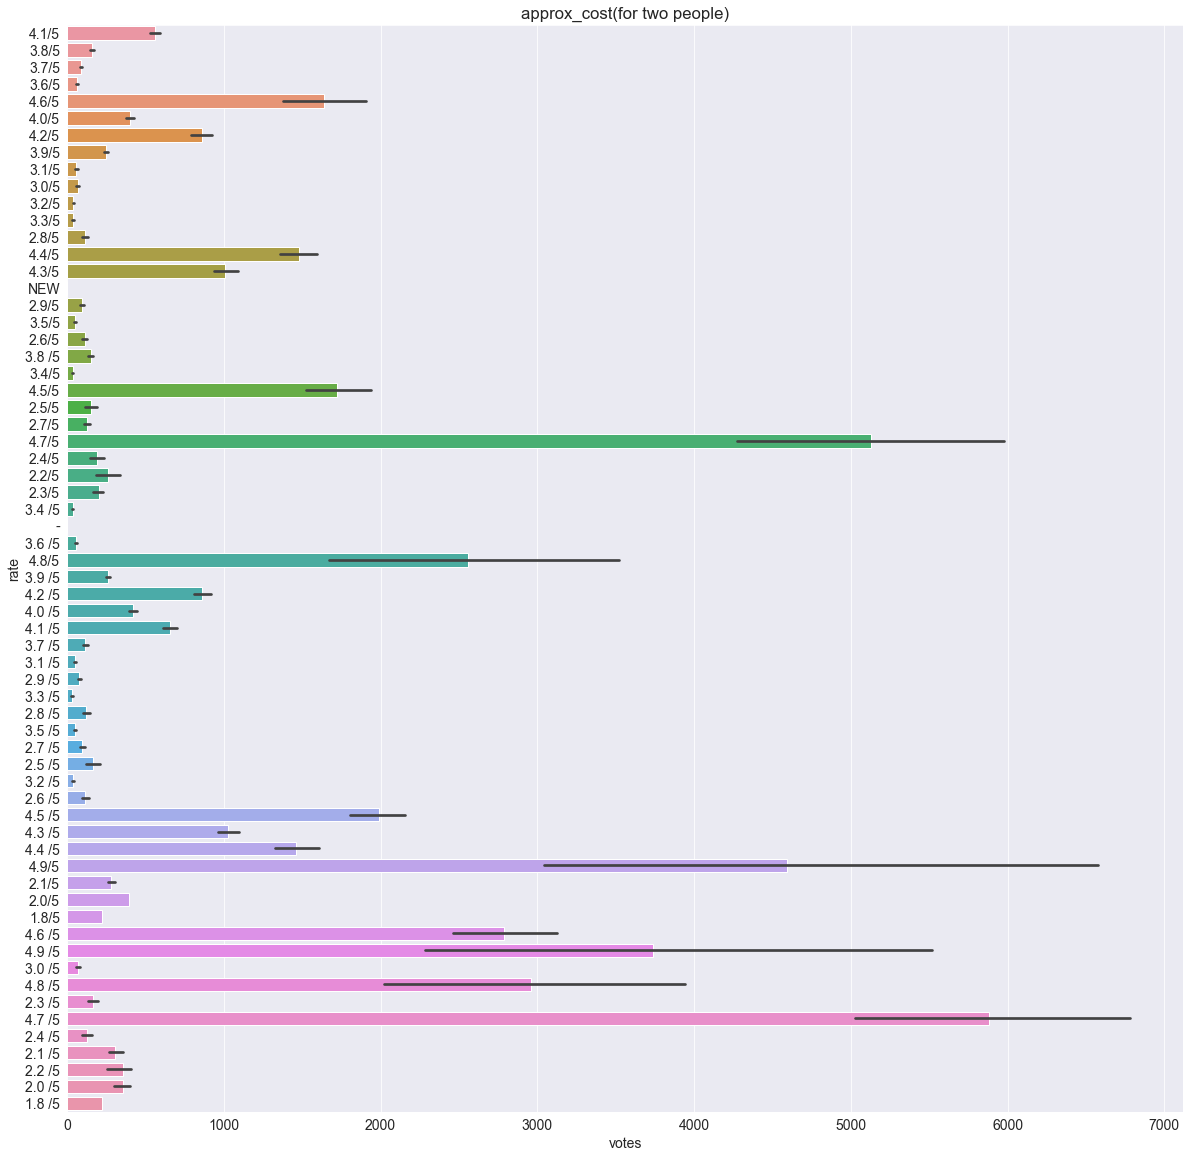

In [76]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(20,20))
# plt.xticks(rotation=75)
plt.title('approx_cost(for two people)')
sns.barplot(x=df['votes'], y=df['rate']);

In [69]:
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [80]:
No_rating = df[df['rate']=='White'].groupby('votes').size().reset_index().rename(columns={0:'listed_in(city)'})
No_rating

,votes,listed_in(city)


In [82]:
country_reviews_list = df[['location','reviews_list']].groupby(['location','reviews_list']).size().reset_index(name='count').drop('count', axis=1, inplace=False)
country_reviews_list.sort_values('reviews_list').reset_index(drop=True)

,location,reviews_list
0,BTM,"[('Rated 1.0', ""RATED\n ... Just now I tasted..."
1,Electronic City,"[('Rated 1.0', ""RATED\n 1st thing i would lik..."
2,Electronic City,"[('Rated 1.0', ""RATED\n 1st thing i would lik..."
3,Electronic City,"[('Rated 1.0', ""RATED\n 1st thing i would lik..."
4,Electronic City,"[('Rated 1.0', ""RATED\n 1st thing i would lik..."
...,...,...
22603,Kammanahalli,[]
22604,Old Airport Road,[]
22605,Malleshwaram,[]
22606,Thippasandra,[]


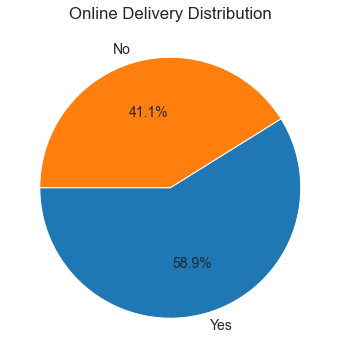

In [87]:
plt.figure(figsize=(12,6))
plt.title('Online Delivery Distribution')
plt.pie(df['online_order'].value_counts()/9551*100, labels=df['online_order'].value_counts().index, autopct='%1.1f%%', startangle=180);


In [90]:
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
plt.figure(figsize=(12,6))
# import plotly.plotly as py

labels = list(df.location.value_counts().head(20).index)
values = list(df.location.value_counts().head(20).values)

fig = {
    "data":[
        {
            "labels" : labels,
            "values" : values,
            "hoverinfo" : 'label+percent',
            "domain": {"x": [0, .9]},
            "hole" : 0.6,
            "type" : "pie",
            "rotation":120,
        },
    ],
    "layout": {
        "title" : "Zomato's Presence Citywise",
        "annotations": [
            {
                "font": {"size":20},
                "showarrow": True,
                "text": "Cities",
                "x":0.2,
                "y":0.9,
            },
        ]
    }
}
iplot(fig);

<Figure size 864x432 with 0 Axes>

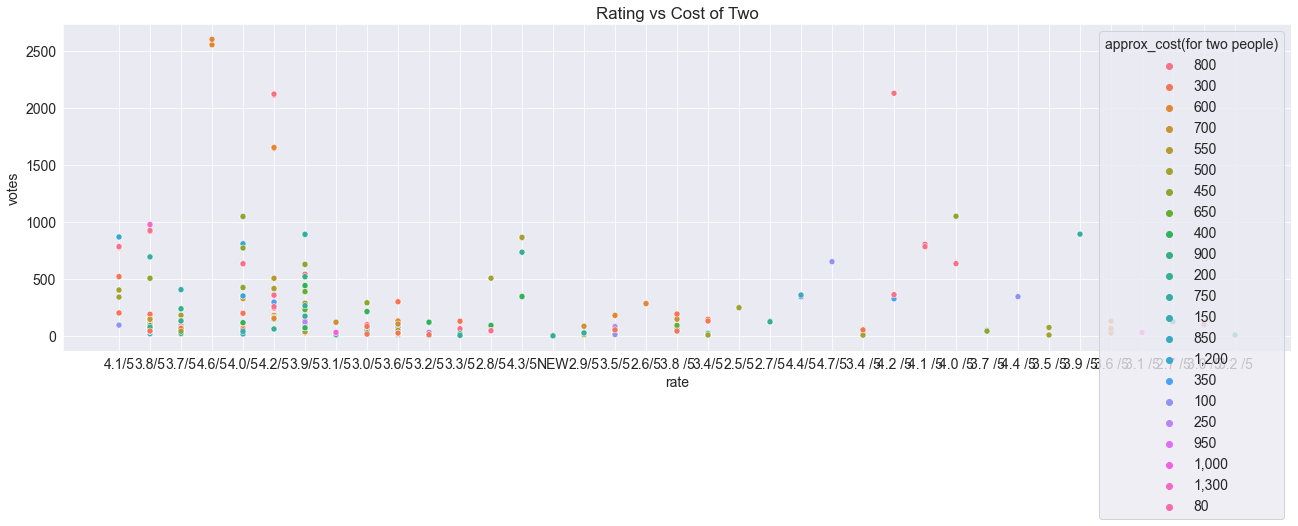

In [119]:
plt.figure(figsize=(22,6))
sns.scatterplot(x="rate", y="votes", hue='approx_cost(for two people)', data=Delhi)

plt.xlabel("rate")
plt.ylabel("votes")
plt.title('Rating vs Cost of Two');

In [94]:
df.head(1)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari


In [122]:
types = {
    "Breakfast and Coffee" : ["Cafe Coffee Day", "Starbucks", "Barista", "Costa Coffee", "Chaayos", "Dunkin' Donuts"],
    "American": ["Domino's Pizza", "McDonald's", "Burger King", "Subway", "Dunkin' Donuts", "Pizza Hut"],
    "Ice Creams and Shakes": ["Keventers", "Giani", "Giani's", "Starbucks", "Baskin Robbins", "Nirula's Ice Cream"]
}

breakfast = Delhi[Delhi['name'].isin(types['Breakfast and Coffee'])]
american = Delhi[Delhi['name'].isin(types['American'])]
ice_cream = Delhi[Delhi['name'].isin(types['Ice Creams and Shakes'])]

In [126]:
breakfast = breakfast[['name','votes']].groupby('name').mean().reset_index().sort_values('votes',ascending=False)
breakfast

,name,votes
0,Cafe Coffee Day,17.0
